In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

> test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

> sample_submission.csv - A submission file in the correct format.

***PassengerId - Id for each passenger in the test set.***

***Transported - The target. For each passenger, predict either True or False.***

In [128]:
train = pd.read_csv('./../SpaceShipTitanic/train.csv')
train.head(25)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [129]:
train.shape

(8693, 14)

In [130]:
train.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

### Попробуем по самым популярным окончаниям имен заполнить атрибут пола, что может позволить добавить еще 1 метрику для более точного предсказания 

In [131]:
def get_gender_improved(name):
    if pd.isna(name):
        return 'Unknown'
        name = str(name).lower().strip()
    gender_patterns = {
        'Male': [
            'o', 'us', 'is', 'as', 'os', 'er', 'or', 'ert', 'ard', 'ick', 
            'ony', 'ius', 'ian', 'eo', 'eus', 'um', 'im', 'am', 'om', 'ert',
            'ald', 'old', 'ond', 'und', 'end', 'and', 'ond', 'unt', 'ant'
        ],
        'Female': [
            'a', 'ia', 'ea', 'ie', 'y', 'ey', 'ee', 'elle', 'ette', 'ine', 
            'ana', 'ina', 'ella', 'ora', 'ara', 'ira', 'era', 'isa', 'esa',
            'ette', 'ine', 'elle', 'ice', 'ace', 'ise', 'ese', 'use', 'ose'
        ]
    }
    
    # Проверка по окончаниям
    for gender, endings in gender_patterns.items():
        for ending in endings:
            if name.endswith(ending):
                return gender
    
    return 'Unknown'

train['Sex'] = train['Name'].apply(get_gender_improved)

gender_stats = train['Sex'].value_counts()
print("Распределение полов:")
print(gender_stats)
print(f"\nПроцент определенных: {(gender_stats['Male'] + gender_stats['Female']) / len(train) * 100:.1f}%")

train.head(5)

train = train.drop('Sex',axis=1)

Распределение полов:
Sex
Unknown    5960
Female     1996
Male        737
Name: count, dtype: int64

Процент определенных: 31.4%


### Для нашей учебной цели, такой результат в 31% заполняемости, поэтому 1 из issues можно определить, созданием наиболее экффективного скрипта определения пола по атрбуту Name

In [132]:
#Удаляем ID пассажира, на предсказание он не влияет
try:
    train = train.drop('PassengerId', axis = 1)
except:
    print("Not exists or alredy done!")
train.head(6)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True


In [133]:
try:
    train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
except:
    print("Exists or already done 1 ")
try:
    train = train.drop('Cabin', axis=1)
except:
    print("Exists or already done 2 ")

deck_mode = train['Deck'].mode()[0]  # Самая частая палуба
num_mode = train['Num'].mode()[0]    # Самый частый номер
side_mode = train['Side'].mode()[0]  # Самая частая сторона

print(f"Самая частая палуба: {deck_mode}")
print(f"Самый частый номер: {num_mode}")
print(f"Самая частая сторона: {side_mode}")


train['Deck'] = train['Deck'].fillna(deck_mode)
train['Num'] = train['Num'].fillna(num_mode)
train['Side'] = train['Side'].fillna(side_mode)

train.head(6)



Самая частая палуба: F
Самый частый номер: 82
Самая частая сторона: S


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P


### Дальше я экспериментировал и напридумывал кучу других фишек

In [145]:
# Общая сумма расходов за все сервисы во время поездки

train['TotalSum'] = train[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# ДЛя категориального признака идеально подойдет разбиение на возразтные группы

train['AgeGroup'] = pd.cut(train['Age'],bins=[-1,12,17,25,40,60,np.inf], labels=[0,1,2,3,4,5])

# Для неизвестных, добавим категорию -1 

train['AgeGroup'] = train['AgeGroup'].cat.add_categories(-1).fillna(-1)

# Кодируем котегориальные признаки
from sklearn.preprocessing import LabelEncoder
cat_cols = ['HomePlanet','Destination','Deck','Side']
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str).fillna('Unknown'))


# Пустые числовые значения заполняем медианой и банарные 0 

train[['VIP', 'CryoSleep']] = train[['VIP', 'CryoSleep']].fillna(value=0)

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSum']
for col in numeric_columns:
    train[col] = train[col].fillna(train[col].median())
train.isnull().sum().sort_values(ascending=False)

# В инты переводим

binary_cols = ['CryoSleep', 'VIP', 'Transported']
for col in binary_cols:
    if col in train:
        train[col] = train[col].astype(int)
train.head(5)

# Разделим имена и фамилии
train['LastName'] = train['Name'].str.split().str[-1]

# Разбиваем на тех кто путешествует 1, а кто нет
try:
    train['GroupSize'] = train.groupby('LastName')['LastName'].transform('count')
except:
    print("already")
train['IsAlone'] = (train['GroupSize'] <= 1).astype(int)

# Удаляем все лишнее
train = train.drop( columns = ['Name', 'LastName', "Num"])


train.head(6)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,TotalSum,AgeGroup,GroupSize,IsAlone
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0,3,1.0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1,736.0,2,4.0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,10383.0,4,6.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,5176.0,3,6.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1091.0,1,6.0,0
5,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.0,1,5,0,774.0,4,7.0,0


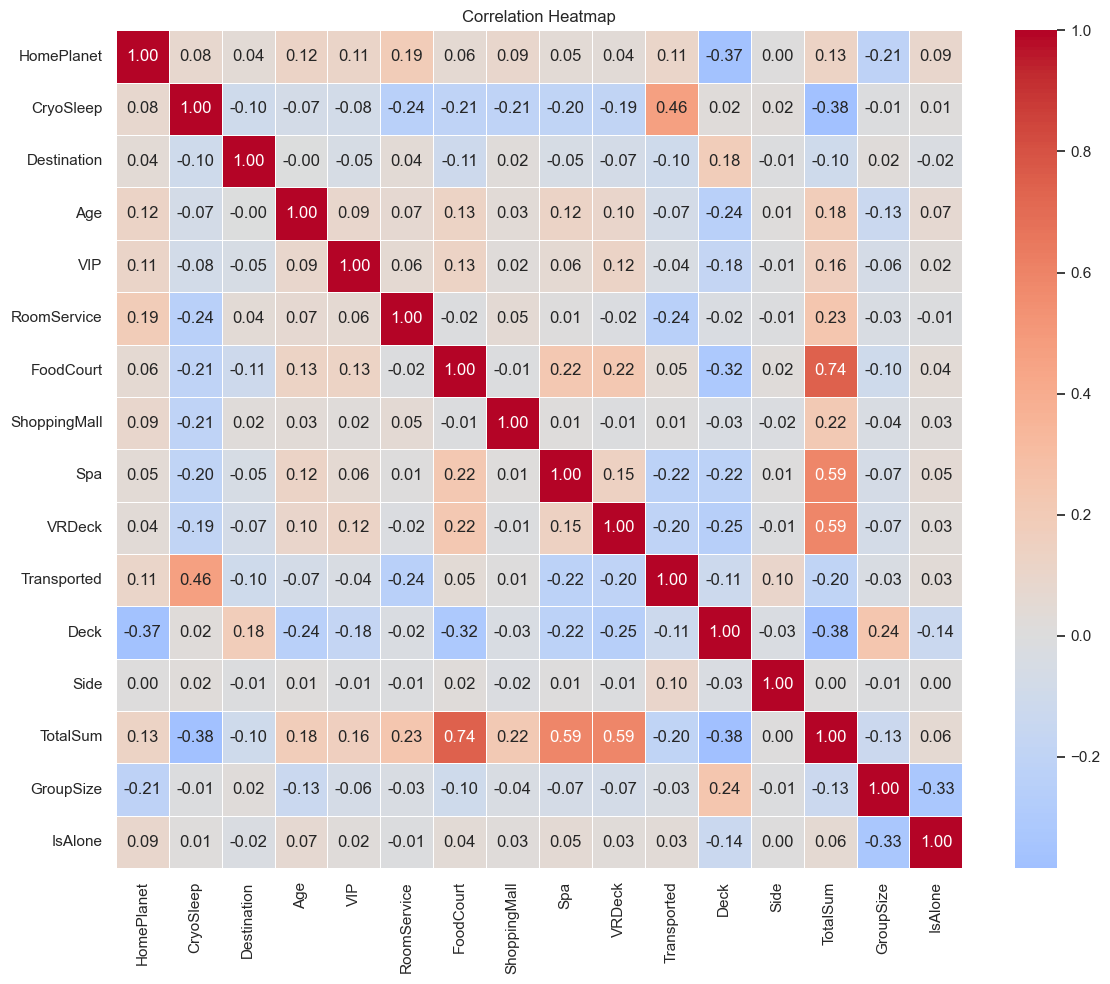

In [146]:

plt.figure(figsize=(12, 10))
correlation_matrix = train.corr(numeric_only = True)

# Создаем heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Из графика видно, что наилучшем образом на то, что человек переметиться влияет его пребывание в Криосне и в меньшей степени сколько человек потратил на фудкорт и шопинг

In [136]:
train['Destination'].value_counts()

Destination
2    5915
0    1800
1     796
3     182
Name: count, dtype: int64

<Axes: title={'center': 'HomePlanet Distribution'}, xlabel='HomePlanet'>

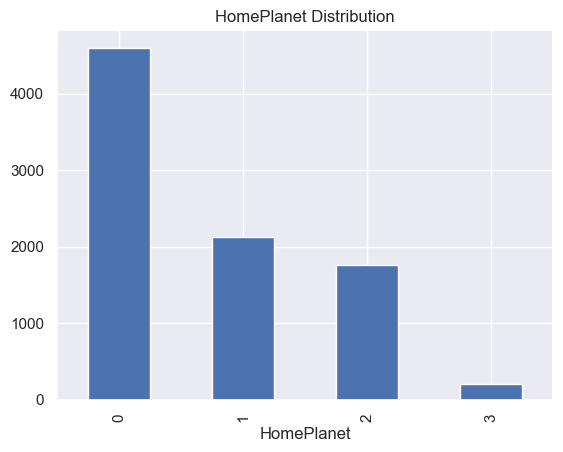

In [137]:
train['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet Distribution')

### Больше всего людей с земли

<Axes: xlabel='Destination', ylabel='Age'>

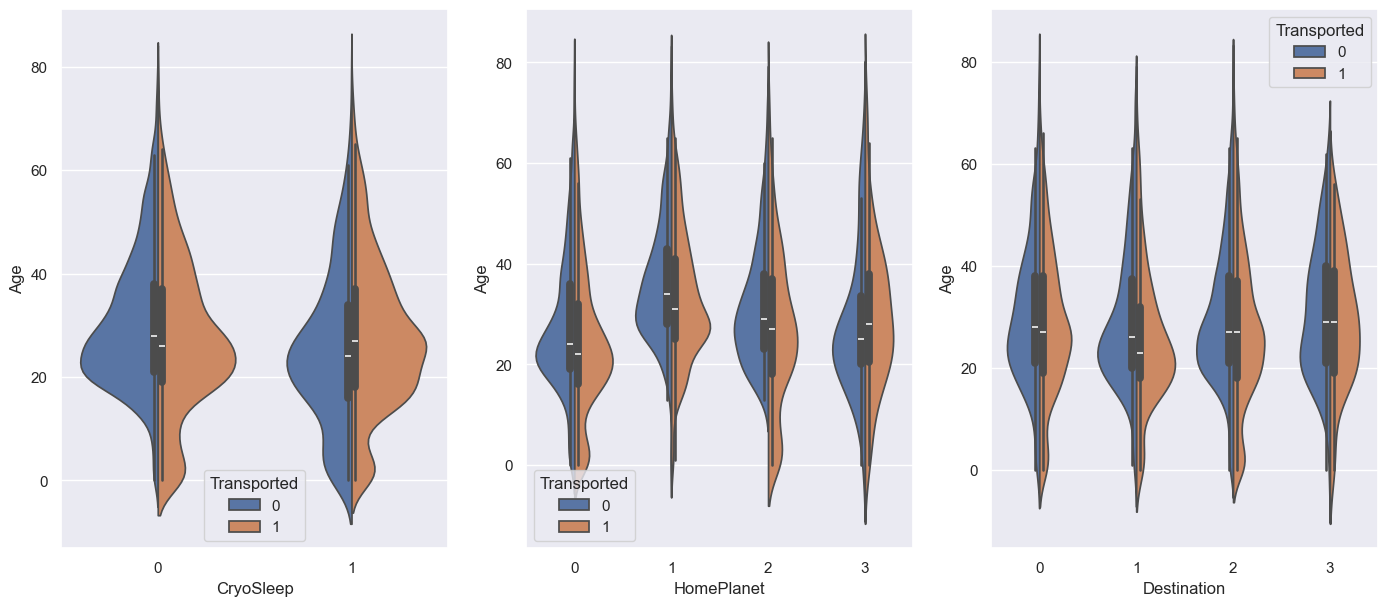

In [138]:
fig = plt.figure(figsize=(17,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


sns.violinplot(  y="Age",  x='CryoSleep',  hue='Transported', data=train, split=True,  ax = ax1)
sns.violinplot( y="Age", x='HomePlanet', hue="Transported", data=train, split=True, ax=ax2)
sns.violinplot( y="Age", x='Destination', hue="Transported", data=train, split=True, ax=ax3)

### Людей, которым 20-30 либо 0-5 (прмиерно), в сравненении с другими атрибутами больше переместит в другую вселенную

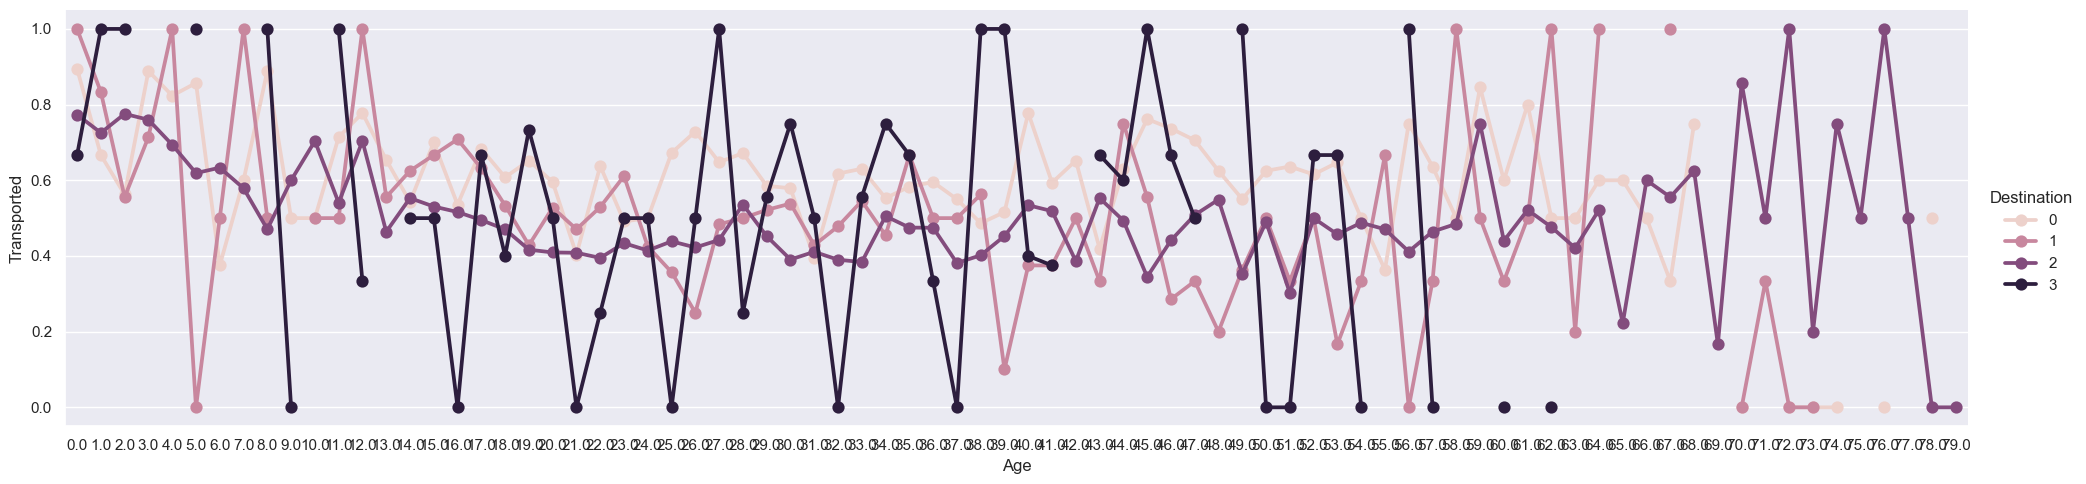

In [139]:
sns.catplot(x='Age', y='Transported', hue='Destination', data=train, kind='point', errorbar=None, aspect=4)

## Подготовка обучающего датасета

In [157]:
# Загрузка тестового датасета
test = pd.read_csv('test.csv')  # замените на ваш путь

# Применяем те же преобразования, что и к train
def prepare_test_data(test_df):
    # Сохраняем PassengerId для сабмита
    passenger_ids = test_df['PassengerId'].copy()
    
    # 1. Извлекаем Deck, Num, Side из Cabin
    test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
    
    # 2. Общая сумма расходов
    test_df['TotalSum'] = test_df[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    
    # 3. Возрастные группы
    test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[-1,12,17,25,40,60,np.inf], labels=[0,1,2,3,4,5])
    test_df['AgeGroup'] = test_df['AgeGroup'].cat.add_categories(-1).fillna(-1)
    
    # 4. Кодируем категориальные признаки
    cat_cols = ['HomePlanet','Destination','Deck','Side']
    for col in cat_cols:
        le = LabelEncoder()
        # Используем те же классы, что и в train
        test_df[col] = le.fit_transform(test_df[col].astype(str).fillna('Unknown'))
    
    # 5. Заполняем пропуски
    test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)
    
    numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSum']
    for col in numeric_columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())
    
    
    # 8. Групповые фичи
    test_df['LastName'] = test_df['Name'].str.split().str[-1]
    test_df['GroupSize'] = test_df.groupby('LastName')['LastName'].transform('count')
    test_df['IsAlone'] = (test_df['GroupSize'] <= 1).astype(int)
    
    # 9. Удаляем лишние столбцы
    columns_to_drop = ['Name', 'LastName', 'Cabin', 'PassengerId']
    test_df = test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns])
    
    return test_df, passenger_ids

# Подготавливаем тестовые данные
test_prepared, passenger_ids = prepare_test_data(test.copy())

# Убедимся, что столбцы совпадают с train
print("Столбцы в train:", train.columns.tolist())
print("Столбцы в test:", test_prepared.columns.tolist())

# Проверим отсутствующие столбцы
missing_cols = set(train.columns) - set(test_prepared.columns)
if missing_cols:
    print("Отсутствующие столбцы:", missing_cols)
    # Добавляем недостающие столбцы с нулевыми значениями
    for col in missing_cols:
        test_prepared[col] = 0

Столбцы в train: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck', 'Side', 'TotalSum', 'AgeGroup', 'GroupSize', 'IsAlone']
Столбцы в test: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side', 'TotalSum', 'AgeGroup', 'GroupSize', 'IsAlone']
Отсутствующие столбцы: {'Transported'}


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

test_with_answers = pd.read_csv('sample_submission.csv')
# 1. Подготовка признаков и целевой переменной
X = train.drop('Transported', axis=1)
y = train['Transported']

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = X, test_prepared, y, test_with_answers['Transported']


print(f"Размеры выборок:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# 3. Обучение дерева решений
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,          # Ограничиваем глубину для избежания переобучения
    min_samples_split=20, # Минимальное количество samples для разделения
    min_samples_leaf=10,  # Минимальное количество samples в листе
    class_weight='balanced' # Учитываем дисбаланс классов
)



dt_model.fit(X_train, y_train)
    
    # Оценка на validation set
y_val_pred = dt_model.predict(X_test)
val_accuracy = accuracy_score(y_test, y_val_pred)

print(f"Accuracy на validation set: {val_accuracy:.4f}")
    

Размеры выборок:
X_train: (8693, 16), X_test: (4277, 18)
y_train: (8693,), y_test: (4277,)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Num
- Transported
